In [3]:
import const
from helper import *

import numpy as np
import matplotlib.pyplot as plt
from sim import Init, Grid


In [4]:
def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2/(2*sigma**2))


In [5]:
grid = Grid(N=512, C=0.4, bc_typ=PER, rsolve=HLL, sloper=MONCEN, do_rad=False)

with Init(grid) as grid:
    
    grid.w[RHO] = 1
    grid.w[VX]  = -0.5 * (np.abs(grid.y-0.5)<0.25) + 0.5*(np.abs(grid.y-0.5)>0.25)
    grid.w[VY]  = 0.1 * np.sin(4*np.pi*grid.x) * (gaussian(grid.y, 0.25, 0.05) + gaussian(grid.y, 0.75, 0.05))
    grid.w[P]   = 2.5

for i in range(200):
    
    grid.step()


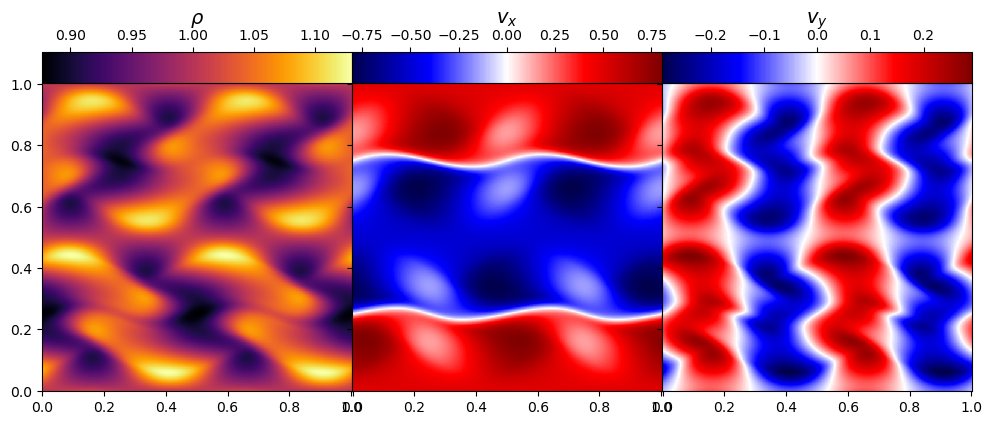

In [6]:
fig, axs = plt.subplots(ncols=3, figsize=(12, 4), sharey=True)
plt.subplots_adjust(hspace=1e-3, wspace=1e-3)

for i in range(3):
    
    cmap  = ['inferno', 'seismic', 'seismic'][i]
    label = [r'$\rho$', r'$v_x$', r'$v_y$'][i]
    
    im   = axs[i].pcolormesh(grid.x, grid.y, grid.w[i], cmap=cmap)
    cax  = axs[i].inset_axes([0, 1, 1, 0.1])
    cbar = plt.colorbar(im, cax=cax, orientation='horizontal')
    
    cbar.set_label(label, fontsize=14)
    cax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
    cax.xaxis.set_label_position('top')


In [26]:
grid = Grid(N=128, C=0.4, bc_typ=NEU, do_hydro=False)

for i in range(200):
    
    grid.inject([0.05, 0.5], 1, xflux=0.99, yflux=0)
    grid.inject([0.95, 0.5], 1, xflux=-0.99, yflux=0)
    grid.step()


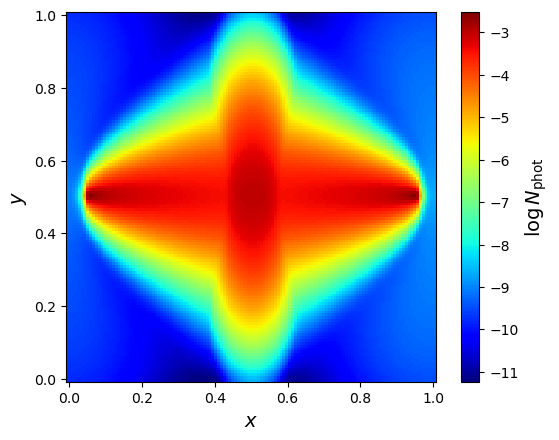

In [27]:
plt.pcolormesh(grid.x, grid.y, np.log10(grid.urad[NPHOT]), cmap='jet')
plt.gca().set_aspect(True)
cbar = plt.colorbar()

plt.xlabel(r'$x$', fontsize=14)
plt.ylabel(r'$y$', fontsize=14)
cbar.set_label(r'$\log N_{\rm phot}$', fontsize=14)
